In [103]:
import pandas as pd
import numpy as np
import yfinance as yf
import random
from os import path
import os
import sys 
import datetime
from dateutil.relativedelta import relativedelta

# data viz packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as plty
from plotly.subplots import make_subplots

In [38]:
clr1 = ["#00ab4e","#58595b","#939598","#000000","#FFFFFF"]
# clr2 = ["#009697","#8dc63f","#f7941d","#ee2f53","#00b5f1","#96157c","#00ab4e","#58595b"]
clr2 = ["#00ab4e","#b1b3b6","#009697","#8dc63f",'#00b5f1','#f7941d','#96157c','#fabfb7','#ee2f53',
       '#b6e4fa','#0066b3','#ffd000','#58595b','#8dc0c4','#c84723','#c4df9b','#103c68','#8f7890',
        '#ffe694','#265b3f','#fbb161','#4b254c']


In [5]:
# Load data
df_fac = pd.read_csv(r'C:\Users\patrick.fang\OneDrive - IHS Markit\Git\ecr-factor-pull\FacData.txt', sep = '\t')

In [7]:
df_fac.head()

,Date,ID,PS
0,2000-01-31,AMZN,18.00118
1,2000-01-31,MSFT,20.39989
2,2000-02-29,AMZN,14.49688
3,2000-02-29,MSFT,18.62825
4,2000-03-31,AMZN,14.10223


In [27]:
### pivot table the data to have factors as columns and PRank as values
df_ = df_fac.pivot_table(index=pd.to_datetime(df_fac.Date), columns='ID', values='PS')


In [28]:
df_.to_csv(r'C:\Users\patrick.fang\OneDrive - IHS Markit\Git\ecr-factor-pull\FacDataPivot.txt', sep = '\t')

## Get pricing data

In [31]:
df_pricing = yf.download("MSFT AMZN NFLX SPY", start="2000-01-01", end="2020-10-30", interval = '1mo')

[*********************100%***********************]  4 of 4 completed


In [32]:
df_pricing.head()

Adj Close                                Close                \
                AMZN       MSFT NFLX         SPY     AMZN     MSFT NFLX   
Date                                                                      
2000-01-01   64.5625  31.235828  NaN   94.582901  64.5625  48.9375  NaN   
2000-02-01   68.8750  28.523144  NaN   93.142738  68.8750  44.6875  NaN   
2000-03-01   67.0000  33.908649  NaN  101.910629  67.0000  53.1250  NaN   
2000-03-17       NaN        NaN  NaN         NaN      NaN      NaN  NaN   
2000-04-01   55.1875  22.260025  NaN   98.581406  55.1875  34.8750  NaN   

                          High           ...  Low                Open  \
                  SPY     AMZN     MSFT  ... NFLX        SPY     AMZN   
Date                                     ...                            
2000-01-01  139.56250  91.5000  59.3125  ...  NaN  135.00000  81.5000   
2000-02-01  137.43750  85.9375  55.0000  ...  NaN  132.71875  67.5000   
2000-03-01  150.37500  75.2500  57.5000  ...  NaN  135.03125  67.6250   
2000-03-17        NaN      NaN      NaN  ...  NaN        NaN      NaN   
2000-04-01  145.09375  68.6250  48.2500  ...  NaN  133.50000  65.4375   

                                         Volume                     \
                MSFT NFLX      SPY         AMZN          MSFT NFLX   
Date                                                                 
2000-01-01  58.68750  NaN  148.250  262209000.0  1.274875e+09  NaN   
2000-02-01  49.25000  NaN  139.750  207457700.0  1.334488e+09  NaN   
2000-03-01  44.81250  NaN  137.625  156584600.0  2.028188e+09  NaN   
2000-03-17       NaN  NaN      NaN          NaN           NaN  NaN   
2000-04-01  47.21875  NaN  150.125  162012500.0  2.258147e+09  NaN   

                         
                    SPY  
Date                     
2000-01-01  156770800.0  
2000-02-01  186938300.0  
2000-03-01  247594900.0  
2000-03-17          NaN  
2000-04-01  229246200.0  

[5 rows x 24 columns]

In [33]:
df_pricing['Adj Close'].to_csv(r'C:\Users\patrick.fang\OneDrive - IHS Markit\Git\ecr-factor-pull\PricingData.txt', sep = '\t')

## Get compiled data (return+price+factor)

In [149]:
df_f = pd.read_csv(r'C:\Users\patrick.fang\OneDrive - IHS Markit\Git\ecr-factor-pull\ReturnData.txt', sep='\t')

In [150]:
df_f.Date = pd.to_datetime(df_f.Date)

In [164]:
df_f.head(40)

,Date,AMZN_PS,AMZN_P,AMZN_Ret3Y,MSFT_PS,MSFT_P,MSFT_Ret3Y,NFLX_PS,NFLX_P,NFLX_Ret3Y,...,SPY_Ret3Y,y_diff,AMZN_TotRet,MSFT_TotRet,NFLX_TotRet,SPY_TotRet,AMZN_AnnRet,MSFT_AnnRet,NFLX_AnnRet,SPY_AnnRet
0,2000-01-31,18.00118,68.875000,-0.68,20.39989,28.523144,-0.47,NaN,NaN,NaN,...,-0.36,20.666667,46.524862,7.580861,NaN,3.712367,0.204188,0.102978,NaN,0.065525
1,2000-02-29,14.49688,67.000000,-0.61,18.62825,33.908649,-0.54,NaN,NaN,NaN,...,-0.41,20.583333,47.826864,6.376839,NaN,3.392973,0.206712,0.094183,NaN,0.061151
2,2000-03-31,14.10223,55.187500,-0.48,22.14547,22.260025,-0.26,NaN,NaN,NaN,...,-0.34,20.500000,58.063871,9.713825,NaN,3.507558,0.219114,0.117289,NaN,0.063128
3,2000-04-28,10.05860,48.312500,-0.26,13.89661,19.966204,-0.21,NaN,NaN,NaN,...,-0.29,20.416667,66.326518,10.829800,NaN,3.563587,0.228077,0.123764,NaN,0.064220
4,2000-05-31,8.80554,36.312500,0.00,12.46461,25.531200,-0.36,NaN,NaN,NaN,...,-0.30,20.333333,88.245092,8.469245,NaN,3.503031,0.246493,0.110789,NaN,0.063594
5,2000-06-30,6.61840,30.125000,0.38,15.93876,22.279972,-0.24,NaN,NaN,NaN,...,-0.28,20.250000,106.370121,9.705129,NaN,3.550555,0.259186,0.118770,NaN,0.064572
6,2000-07-31,4.90314,41.500000,0.12,14.45812,22.279972,-0.24,NaN,NaN,NaN,...,-0.31,20.166667,77.214455,9.705129,NaN,3.332788,0.240523,0.119289,NaN,0.061511
7,2000-08-31,6.75454,38.437500,0.26,14.45812,19.248138,-0.08,NaN,NaN,NaN,...,-0.27,20.083333,83.366502,11.233813,NaN,3.535104,0.246382,0.127998,NaN,0.064894
8,2000-09-29,6.25609,36.625000,0.49,12.49068,21.980774,-0.24,NaN,NaN,NaN,...,-0.23,20.000000,87.492147,9.837233,NaN,3.542819,0.250542,0.121098,NaN,0.065289
9,2000-10-31,5.28954,24.687500,1.19,14.09759,18.310667,-0.10,NaN,NaN,NaN,...,-0.16,19.916667,129.798477,11.808963,NaN,3.828637,0.276749,0.131970,NaN,0.069730


### Calculate Annualized Return To Date

In [157]:
# from point to 9/30/2020
# df_f['y_diff'] = [relativedelta(i, df_f['Date'][0]).years+relativedelta(i, df_f['Date'][0]).months/12 for i in df_f['Date']]
df_f['y_diff'] = [
    relativedelta(df_f['Date'].iloc[-1],i).years + 
    relativedelta(df_f['Date'].iloc[-1],i).months/12 for i in df_f['Date']
]

In [156]:
df_f['Date'].iloc[-1]

Timestamp('2020-09-30 00:00:00')

In [161]:
# NFLX starts line 27
# Total Return (from that day to 9/30/2020)

# df_f['AMZN_TotRet'] = df_f['AMZN_P']/df_f['AMZN_P'][0]
# df_f['MSFT_TotRet'] = df_f['MSFT_P']/df_f['MSFT_P'][0]
# df_f['NFLX_TotRet'] = df_f['NFLX_P']/df_f['NFLX_P'][27]
# df_f['SPY_TotRet'] = df_f['SPY_P']/df_f['SPY_P'][0]

l_sec = ['AMZN','MSFT','NFLX','SPY']

for i in l_sec:
    df_f[f'{i}_TotRet'] = df_f[f'{i}_P'].iloc[-1]/df_f[f'{i}_P']

In [163]:
# Annualized return
for i in l_sec:
    df_f[f'{i}_AnnRet'] = df_f[f'{i}_TotRet'].pow(1/df_f['y_diff'])-1


In [ ]:
# should exclude anything shorter than 1/3 year/s


In [172]:
# scatter plot valuation vs. forward return
fig1 = plty.Figure()
fig1.add_trace(plty.Scatter(x=np.log(df_f.AMZN_PS.iloc[:-24]),
                            y=df_f.AMZN_AnnRet.iloc[:-24],
                            mode='markers',
                            text=df_f.Date,
                            marker_color=clr1[0]))
fig1.update_layout(
    title = 'Scatterplot of AMZN_PS vs. AMZN_Ret3Y',
    yaxis_title = 'AMZN Forward 3 Years Return',
    xaxis_title = 'log of AMZN TTM P/S Ratio'
)
fig1.show()

In [76]:

max(df_f['Date'])

Timestamp('2020-09-30 00:00:00')

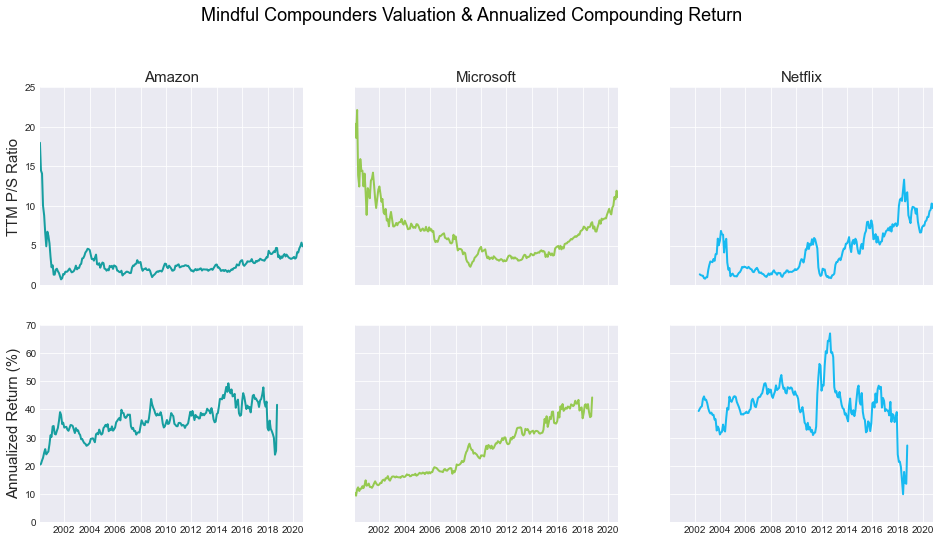

In [203]:
# Initialize the figure
fig, ax = plt.subplots(2,3, figsize=(16,8))
plt.style.use('seaborn-darkgrid')

xlim1 = min(df_f['Date'])
xlim2 = max(df_f['Date'])

plt.subplot(2,3,1)
plt.plot(df_f['Date'],df_f['AMZN_PS'], marker='', color=clr2[2], linewidth=2, alpha=0.9)
plt.title('Amazon', fontsize=15)
plt.ylabel('TTM P/S Ratio', fontsize=15)
plt.ylim(0,25)
plt.xlim(xlim1, xlim2)
plt.tick_params(labelbottom=False)

plt.subplot(2,3,2)
plt.plot(df_f['Date'],df_f['MSFT_PS'], marker='', color=clr2[3], linewidth=2, alpha=0.9)
plt.title('Microsoft', fontsize=15)
plt.ylim(0,25)
plt.xlim(xlim1, xlim2)
plt.tick_params(labelleft=False)
plt.tick_params(labelbottom=False)

plt.subplot(2,3,3)
plt.plot(df_f['Date'],df_f['NFLX_PS'], marker='', color=clr2[4], linewidth=2, alpha=0.9)
plt.title('Netflix', fontsize=15)
plt.ylim(0,25)
plt.xlim(xlim1, xlim2)
plt.tick_params(labelleft=False)
plt.tick_params(labelbottom=False)

plt.subplot(2,3,4)
plt.plot(df_f['Date'].iloc[:-24],df_f['AMZN_AnnRet'].iloc[:-24]*100, marker='', color=clr2[2], linewidth=2, alpha=0.9)
plt.ylabel('Annualized Return (%)', fontsize=15)
plt.xlim(xlim1, xlim2)
plt.ylim(0,70)

plt.subplot(2,3,5)
plt.plot(df_f['Date'].iloc[:-24],df_f['MSFT_AnnRet'].iloc[:-24]*100, marker='', color=clr2[3], linewidth=2, alpha=0.9)
plt.xlim(xlim1, xlim2)
plt.ylim(0,70)
plt.tick_params(labelleft=False)

plt.subplot(2,3,6)
plt.plot(df_f['Date'].iloc[:-24],df_f['NFLX_AnnRet'].iloc[:-24]*100, marker='', color=clr2[4], linewidth=2, alpha=0.9)
plt.xlim(xlim1, xlim2)
plt.ylim(0,70)
plt.tick_params(labelleft=False)

# general title
plt.suptitle("Mindful Compounders Valuation & Annualized Compounding Return", fontsize=18, color='black', y=1.02)

fig.savefig('plot01.pdf',format='pdf')

In [ ]:
# multiple line plot
num=0
for column in df.drop('x', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(3,3, num)
 
    # Plot the lineplot
    plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)
 
    # Same limits for everybody!
    plt.xlim(0,10)
    plt.ylim(-2,22)
 
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
 
# general title
plt.suptitle("How the 9 students improved\nthese past few days?", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
 
# Axis title
plt.text(0.5, 0.02, 'Time', ha='center', va='center')
plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')